# USA not likely to medal

## Scalinbg doesn't improve

##  Grid Search k-folds cv -  no effect
## Feature importance had no effect

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
# from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
# import graphviz
from sklearn.dummy import DummyClassifier
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../Combine_Data/men/vt_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_vt.csv')
vtnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_vtnames.csv')
vtolymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')



In [4]:
olymp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             3099 non-null   float64
 1   D Score          3099 non-null   float64
 2   E Score          3099 non-null   float64
 3   Pen.             3099 non-null   float64
 4   Total            3099 non-null   float64
 5   year             3099 non-null   int64  
 6   Name             3099 non-null   int64  
 7   nation           3099 non-null   int64  
 8   round_AAfinal    3099 non-null   bool   
 9   round_AAqual     3099 non-null   bool   
 10  round_TeamFinal  3099 non-null   bool   
 11  round_TeamQual   3099 non-null   bool   
 12  round_final      3099 non-null   bool   
 13  round_qual       3099 non-null   bool   
dtypes: bool(6), float64(5), int64(3)
memory usage: 212.0 KB


# Clean df and olymp data sets

In [5]:
olymp=olymp.drop(columns=['round_AAfinal', 'round_AAqual', 'round_TeamFinal', 'round_final',
       'round_qual'])

In [6]:
df['Rank'] = df['Rank'].replace('—', 40)

In [7]:
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

In [8]:
olymp=olymp.drop(columns=['round_TeamQual'])

In [9]:
df=df.drop(columns=['Total', 'D.1', 'E.1','ND.1','Total.1'])

In [10]:
df.rename(columns={'D':'D Score', 'E':'E Score',
                    'ND': 'Pen.', 'Average': 'Total', 'Nation':'nation'}, inplace=True)

In [11]:
olympz=olymp.copy()

# Base line using ZeroR

In [12]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize  ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions on  test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate  model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9524
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.00      0.00      0.00         2

    accuracy                           0.95        42
   macro avg       0.48      0.50      0.49        42
weighted avg       0.91      0.95      0.93        42

Confusion Matrix:
[[40  0]
 [ 2  0]]


# Model Comparison


In [13]:

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }

for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 0.9524
F2-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.00      0.00      0.00         2

    accuracy                           0.95        42
   macro avg       0.48      0.50      0.49        42
weighted avg       0.91      0.95      0.93        42

Confusion Matrix:
[[40  0]
 [ 2  0]]

Classifier: AdaBoost
Accuracy: 0.9048
F2-Score: 0.4167
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        40
           1       0.25      0.50      0.33         2

    accuracy                           0.90        42
   macro avg       0.61      0.71      0.64        42
weighted avg       0.94      0.90      0.92        42

Confusion Matrix:
[[37  3]
 [ 1  1]]

Classifier: SVM
Accuracy: 0.9524
F2-Score: 0.0000
Classification Report:
              precision    recall  f

# Grid Search k-folds cv -  no effect

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the AdaBoost classifier
# CHANGING LEARNING RATE TO 0.31 RESULTS IN 1.000
clf = AdaBoostClassifier(n_estimators=20, learning_rate=0.37321)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30, 50],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Initialize StratifiedKFold for k-fold cross-validation
k_folds = 5
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Use the best estimator from grid search
best_clf = grid_search.best_estimator_

# Iterate over folds for evaluation
for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train, y_train)):
    print(f"\nFold {fold + 1}")

    # Split the data into training and testing sets for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model for this fold
    best_clf.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation data for this fold
    y_pred = best_clf.predict(X_val_fold)

    # Evaluate the model's performance for this fold
    accuracy = accuracy_score(y_val_fold, y_pred)
    report = classification_report(y_val_fold, y_pred)
    conf_matrix = confusion_matrix(y_val_fold, y_pred)

    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{conf_matrix}")

# Make predictions on the test data
y_pred_test = best_clf.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Print the results for the test set
print("\nTest Set Results")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Classification Report:\n{report_test}")
print(f"Confusion Matrix:\n{conf_matrix_test}")



Fold 1
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 10}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Confusion Matrix:
[[17]]

Fold 2
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 10}
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         1

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Confusion Matrix:
[[16  0]
 [ 0  1]]

Fold 3
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 10}
Accuracy: 1.0000
Classification Report:

# Feature Importance

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=20, learning_rate=.37321)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Rank: 0.0500
D Score: 0.0500
E Score: 0.0500
Pen.: 0.0000
year: 0.0500
Total: 0.0000
Name: 0.6500
nation: 0.1500


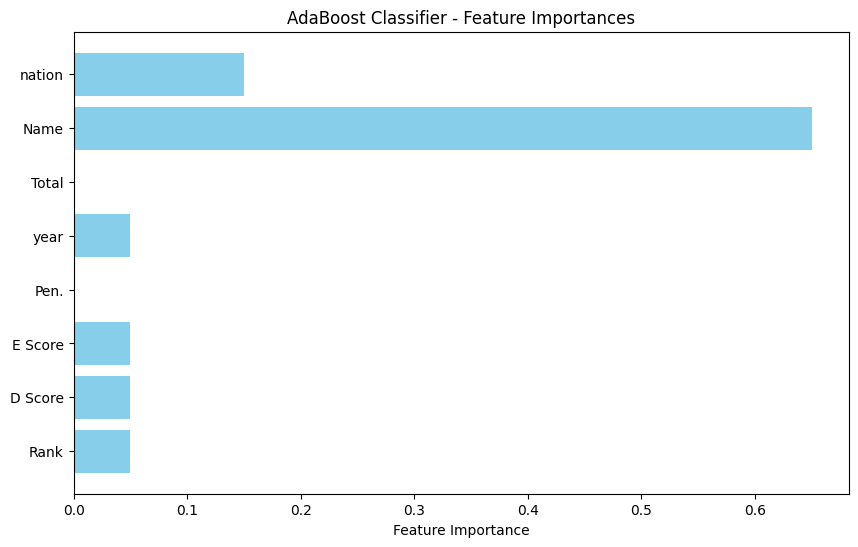

In [16]:
import matplotlib.pyplot as plt

feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


above df has no false negatives, meaning, its not incorrectly selecting someone who medaled to not medal. and 3 False Positives, where saying 3 people medaled who actually didnt'. I'd rather pick some people who wont medal than leave out people who will medal

# Final Model

In [17]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the AdaBoost classifier
# CHANGING LEARNIN RATE TO 0.31 RESULTS IN 1.000 
clf = AdaBoostClassifier(n_estimators=20, learning_rate=.37321)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

AdaBoost Classifier
Accuracy: 0.9286
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.40      1.00      0.57         2

    accuracy                           0.93        42
   macro avg       0.70      0.96      0.77        42
weighted avg       0.97      0.93      0.94        42

Confusion Matrix:
[[37  3]
 [ 0  2]]


# Model Trained earlier, now using 2023/2022 data

In [18]:
olymp=olympz.copy()

In [19]:
desired_column_order = ['Rank', 'D Score', 'E Score', 'Pen.', 'year', 'Total',
                        'Name', 'nation'] 

# Create a new DataFrame with the desired column order
olymp = olymp[desired_column_order]

In [20]:
y_pred = clf.predict(olymp)

In [21]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds


In [22]:
olymp['ypred'].value_counts()

0    2987
1     112
Name: ypred, dtype: int64

In [23]:
filtered_df = olymp[olymp['ypred'] == 1]

In [24]:
filtered_df['Name'].unique()

array([613,  61, 272, 370, 369, 244,  16, 614, 271,  73, 151, 141, 152])

# vtnames used to match encoded names with actual names

In [25]:
name_encoded_values = [613,  61, 272, 370, 369, 244,  16, 614, 271,  73, 151, 141, 152]

# Filter the DataFrame to get the corresponding "Name" values
result = vtnames.loc[vtnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [26]:
result.unique()

array(['santiago agostinelli', 'artur davtyan',
       'houssem eddine hamadouche', 'julian jato', 'julian ezequiel jato',
       'gagik khachikyan', 'ahmed anis maoudj', 'santiago mayol',
       'hillal metidji', 'benedek tomcsanyi', 'daniel villafane',
       'daniel angel villafane', 'daniel villafañe'], dtype=object)

# srolymp used to get country info from name list above

In [27]:
vtolymp["Name"]=vtolymp["Name"].str.lower()

In [28]:
names_to_filter = ['santiago agostinelli', 'artur davtyan',
       'houssem eddine hamadouche', 'julian jato', 'julian ezequiel jato',
       'gagik khachikyan', 'ahmed anis maoudj', 'santiago mayol',
       'hillal metidji', 'benedek tomcsanyi', 'daniel villafane',
       'daniel angel villafane', 'daniel villafañe']

# Filter the DataFrame to get rows with the specified "Name" values
result = vtolymp[vtolymp['Name'].isin(names_to_filter)]

In [29]:
result['Country'].value_counts()

ARM    165
ARG     94
HUN     46
ALG     21
Name: Country, dtype: int64

# Find names from USA

In [30]:
result[result['Country']=='USA']

,Name,Country,Date,Gender,Competition,Round,Location,Apparatus,Rank,D_Score,E_Score,Penalty,Score,Total_Score
